In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
color_map = dict(zip(['Z', 'R', 'O', 'Y', 'G', 'C', 'B', 'V', 'S', 'K'],
                     ['black', 'red', 'orange', 'yellow', 'springgreen', 'cyan', 'blue', 'violet', 'lime', 'darkorange']))

@np.vectorize
def convert(c):
    return color_map[c]

In [4]:
def read(file, reverse=False, zero=True, maxes=True):
    data = pd.read_csv(file, sep=' ', comment='#', header=None)
    if reverse: data = data.reindex(index=data.index[::-1]); data = data.reset_index(drop=True)
    data[1] += data[2]/60
   # print(data[0])
    if maxes:
        data[2] = data[0].apply(lambda t: t[1])
    else:
        del data[2]
    data[0] = data[0].apply(lambda t: t[0])
    
    if zero:
        data[1] -= data[1][0]
        data = data.drop(index=0)
    return data

def calculate_averages(data):
    #data = np.array(data)
    s = set(data[0])
    a = {}
    for c in s:
        a[c] = np.average(np.abs(data[np.logical_and((data[0] == c), (data[1] == data[1]))][1]))
    return a

In [5]:
def difr_angle_to_λ(angles, max_num):
    return np.sin(np.radians(np.abs(np.array(angles, dtype=float))))*(1e-3/500)/np.array(max_num,dtype=float)/1e-9

In [6]:
def calculate_average(data):
    d_filter = data[data[1]== data[1]]
    d_filter = d_filter.assign(λ=difr_angle_to_λ(d_filter[1], d_filter[2]))
    #print(list(d_filter.groupby(0)))

    return d_filter.groupby(0).apply(lambda t: np.average(t['λ']))

In [7]:
@np.vectorize
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

In [8]:
data = read('HG.txt')
data2 = read('HG_2.txt', reverse=True)
#%matplotlib widget
#plt.scatter(data[0], data[1], c=convert(data[0]))
#plt.show()

In [9]:
#%matplotlib widget
#plt.scatter(data2[0], data2[1], c=convert(data2[0]))
#print(data2)
#plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
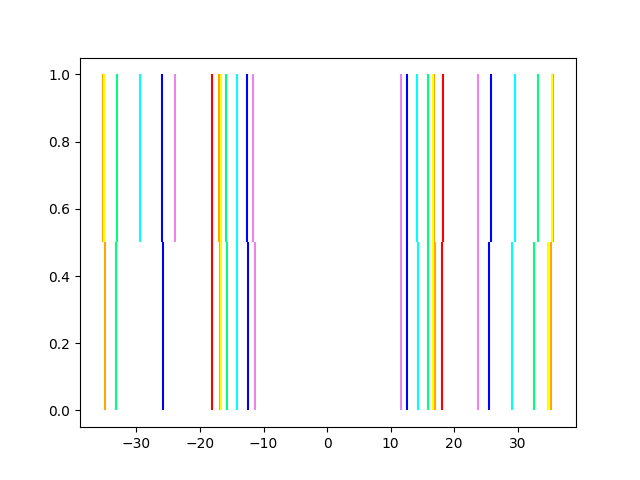

In [10]:
data1 = read('HG.txt')

%matplotlib widget
plt.vlines(data1[1], 0, 0.5, colors=convert(data1[0]))
plt.vlines(data2[1], 0.5, 1, colors=convert(data2[0]))
#plt.scatter(data2[1], np.zeros(len(data2[1])), c=convert(data2[0]), s=3)
#plt.scatter(data1[1], np.ones(len(data1[1])), c=convert(data1[0]), s=3)
plt.show()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2246: RuntimeWarning: invalid value encountered in wavelength_to_rgb (vectorized)
  outputs = ufunc(*inputs)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
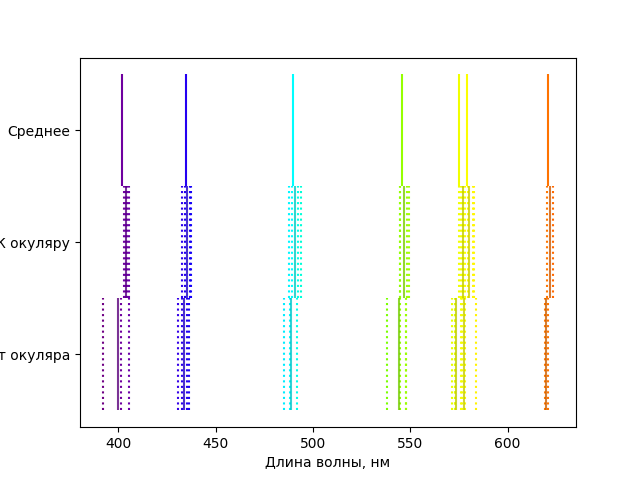

In [126]:

%matplotlib widget
fig, ax = plt.subplots()
#sax = ax.secondary_yaxis('right')
ax.set_yticks([0.25, 0.75, 1.25], ['От окуляра','К окуляру', 'Среднее'])
ax.set_xlabel("Длина волны, нм")
d1 = difr_angle_to_λ(data[1], data[2])
#print(d1)
plt.vlines(d1, 0, 0.5, colors=np.array(wavelength_to_rgb(d1)).swapaxes(0,1), linestyle=":")
plt.vlines(calculate_average(data1), 0, 0.5, colors=(np.array(wavelength_to_rgb(calculate_average(data1)))*0.8).swapaxes(0,1))

d2 = difr_angle_to_λ(data2[1], data2[2])
plt.vlines(d2, 0.5, 1.0, colors=np.array(wavelength_to_rgb(d2)).swapaxes(0,1), linestyle=":")
plt.vlines(calculate_average(data2), 0.5, 1.0, colors=(np.array(wavelength_to_rgb(calculate_average(data2)))*0.8).swapaxes(0,1))

total_average = (calculate_average(data2) + calculate_average(data1))/2

plt.vlines(total_average, 1.0, 1.5, colors=(np.array(wavelength_to_rgb(total_average))).swapaxes(0,1))

In [12]:
all_ = data
all_ = data.append(data2, ignore_index=True)
all_ = all_.assign(λ=np.concatenate((d1, d2)))
#all_ = all_.assign(λ=d1)
all_ = all_[all_ == all_]


In [13]:
all_.groupby(0).apply(lambda t: np.std(t['λ']))

0
B    2.226831
C    2.727076
G    3.466067
O    3.390927
R    1.629865
V    4.446185
Y    2.481833
dtype: float64

In [14]:
print(np.round(total_average, 2)[::-1].to_markdown())

| 0   |      0 |
|:----|-------:|
| Y   | 575.14 |
| V   | 401.9  |
| R   | 620.94 |
| O   | 578.92 |
| G   | 545.65 |
| C   | 489.66 |
| B   | 434.55 |


,0,1
0,R,211.166667
1,O,210.633333
2,G,210.366667
3,C,209.716667
4,B,208.733333
5,V,207.683333
6,R,370.166667
7,Y,307.400000
8,G,307.866667
9,C,308.600000


In [16]:
data3 = read('Na.txt', reverse=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
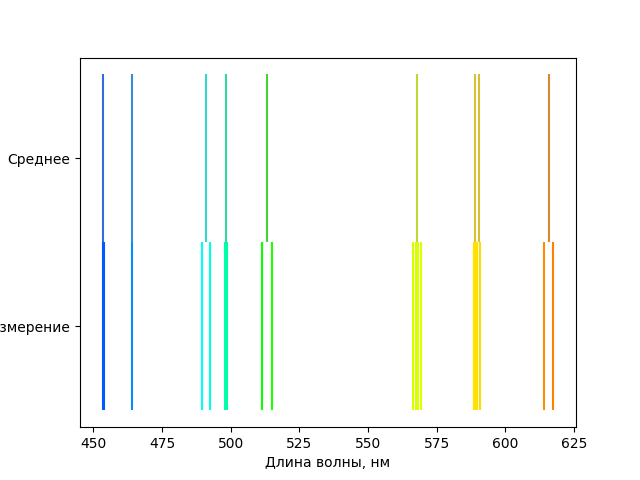

In [17]:
%matplotlib widget

fig, ax = plt.subplots()


ax.set_xlabel("Длина волны, нм")
ax.set_yticks([0.25, 0.75], ['Измерение', 'Среднее'])

d3 = np.round(np.sin(np.radians(np.abs(data3[1])))*(1e-3/500)/np.array(data3[2],dtype=float)/1e-9, 2)
#sax = ax.secondary_yaxis('right')
#ax.set_yticks([0.25, 0.75], ['Left','Right'])
plt.vlines(d3, 0, 0.5, colors=np.array(wavelength_to_rgb(d3)).swapaxes(0,1))
#print(data3[0], d3)
plt.vlines(calculate_average(data3), 0.5, 1.0, colors=(np.array(wavelength_to_rgb(calculate_average(data3)))*0.8).swapaxes(0,1))
#convert(data3[0]))

In [18]:
print(np.round(calculate_average(data3).sort_values(0, ascending=False), 2).to_markdown())

| 0   |      0 |
|:----|-------:|
| R   | 615.82 |
| K   | 590.3  |
| O   | 588.8  |
| Y   | 567.86 |
| S   | 513.14 |
| G   | 498.22 |
| C   | 490.9  |
| B   | 464.06 |
| V   | 453.59 |


In [19]:
data3.sort_values(1)

,0,1,2
21,O,-36.116667,2
20,Y,-34.633333,2
11,R,-17.983333,1
12,K,-17.183333,1
13,O,-17.116667,1
14,Y,-16.533333,1
15,S,-14.916667,1
16,G,-14.433333,1
17,C,-14.250000,1
18,B,-13.416667,1


In [35]:
pr = read('HG_PR.txt', zero=False, maxes=False)
pr

,0,1
0,R,211.166667
1,O,210.633333
2,G,210.366667
3,C,209.716667
4,B,208.733333
5,V,207.683333
6,R,307.166667
7,Y,307.400000
8,G,307.866667
9,C,308.600000


In [117]:
def n(θ, θ_red):
    α = np.pi/3
    return np.sqrt(((np.sin(θ + α/2 - θ_red/2) + np.cos(α)*np.sin(α/2 + θ_red/2))
                   /np.sin(α))**2 + np.sin(α/2 + θ_red/2)**2)

z = (259 + 10/60)

In [118]:
p = pr[1][pr[1] < z]
r1 = n(-(p - z)/180*np.pi, -(p.iloc[0] - z)/180*np.pi)
col = pr[0][pr[1] > z]
p = pr[1][pr[1] > z]
r2 = n((p - z)/180*np.pi, (p.iloc[0] - z)/180*np.pi)

In [119]:
result = (np.array(r1) + np.array(r2))/2
result, total_average[col], col

(array([1.61803399, 1.62194741, 1.62566422, 1.63258764, 1.64304556,
        1.65221271]),
 0
 R    620.937875
 Y    575.142154
 G    545.645727
 C    489.660761
 B    434.545937
 V    401.903723
 dtype: float64,
 6     R
 7     Y
 8     G
 9     C
 10    B
 11    V
 Name: 0, dtype: object)

[1.59362134 0.00940872] [0.00051573 0.00011995]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
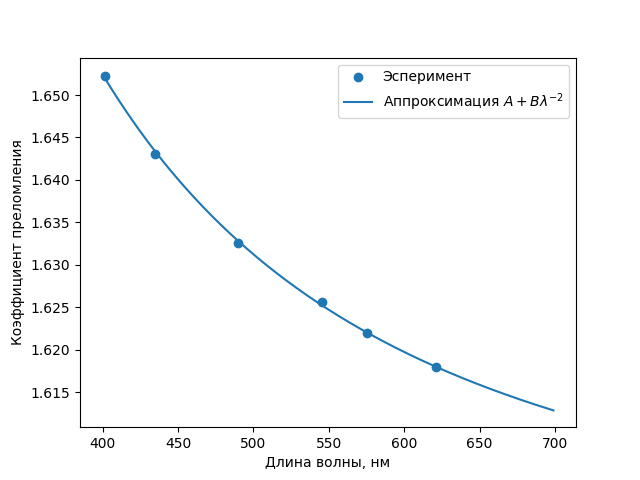

In [157]:
from scipy.optimize import curve_fit

%matplotlib widget
plt.scatter(total_average[col], result, label="Эсперимент")
plt.xlabel("Длина волны, нм")
plt.ylabel("Коэффициент преломления")
x = np.arange(400, 700)
f = lambda x, A, B: A + B/(x*1e-3)**2
y = f(x, 1.5220, 0.00459)
res, err = curve_fit(f, total_average[col], result)
plt.plot(x, f(x, *res), label="Аппроксимация $A+B\lambda^{-2}$")
#plt.plot(x, y)
plt.legend()
print(res, np.sqrt(np.diag(err)))

In [127]:
pr_na = read('HG_PR.txt', zero=False, maxes=False)
pr_na

,0,1
0,R,211.166667
1,O,210.633333
2,G,210.366667
3,C,209.716667
4,B,208.733333
5,V,207.683333
6,R,307.166667
7,Y,307.400000
8,G,307.866667
9,C,308.600000


In [128]:
p = pr_na[1][pr_na[1] < z]
r1 = n(-(p - z)/180*np.pi, -(p.iloc[0] - z)/180*np.pi)
r1

0    1.618034
1    1.623473
2    1.626169
3    1.632670
4    1.642320
5    1.652370
Name: 1, dtype: float64

In [129]:
p = pr[1][pr[1] < z]
r1 = n(-(p - z)/180*np.pi, -(p.iloc[0] - z)/180*np.pi)
col = pr[0][pr[1] > z]
p = pr[1][pr[1] > z]
r2 = n((p - z)/180*np.pi, (p.iloc[0] - z)/180*np.pi)

In [130]:
result_na = (np.array(r1) + np.array(r2))/2
result_na, calculate_average(data3)[col], col

(array([1.61803399, 1.62194741, 1.62566422, 1.63258764, 1.64304556,
        1.65221271]),
 0
 R    615.820127
 Y    567.857515
 G    498.224970
 C    490.896637
 B    464.061725
 V    453.585923
 dtype: float64,
 6     R
 7     Y
 8     G
 9     C
 10    B
 11    V
 Name: 0, dtype: object)

[1.57801782 0.01389325] [0.01191863 0.00299205]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
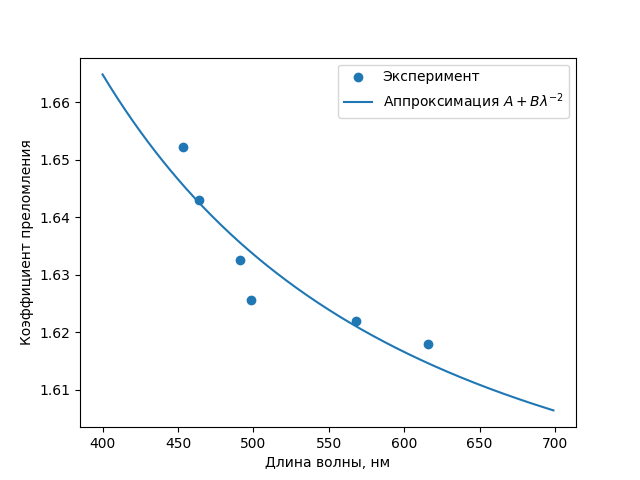

In [158]:
from scipy.optimize import curve_fit

%matplotlib widget
plt.xlabel("Длина волны, нм")
plt.ylabel("Коэффициент преломления")
plt.scatter(calculate_average(data3)[col], result_na, label="Эксперимент")
#plt.scatter(total_average[col], result)
x = np.arange(400, 700)
f = lambda x, A, B: A + B/(x*1e-3)**2
y = f(x, 1.5220, 0.00459)
res, err = curve_fit(f, calculate_average(data3)[col], result_na)
plt.plot(x, f(x, *res), label="Аппроксимация $A+B\lambda^{-2}$")
#plt.plot(x, y)
plt.legend()
print(res, np.sqrt(np.diag(err)))